### Assignment 4 - GPU acceleration


by Généreux M. AKOTENOU

In [1]:
"""
En exécutant tout ce notebook, le dossier 'genereux_akotenou3' sera créé et il contiendra les fichiers Python de chaque exercice.
On pourra par la suite utiliser la commande suivante pour exécuter chaque script et voir les sorties :

$ mpirun -n <number> python3 <filename.py>
"""
import os
directory = 'genereux_akotenou4'
if not os.path.exists(directory):
    os.makedirs(directory)

* Exercise 1

CudaSupportError: Error at driver init: Call to cuInit results in CUDA_ERROR_NOT_INITIALIZED (3)

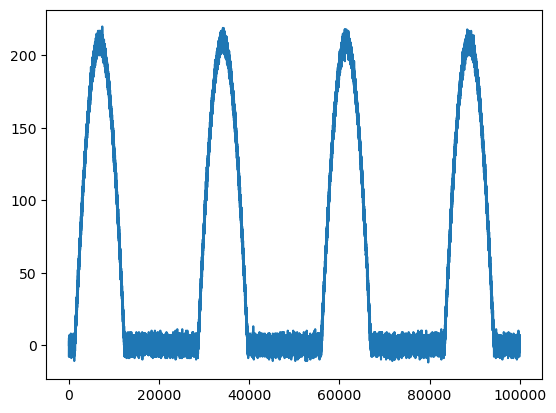

In [2]:
#%%file genereux_akotenou4/exo1.py

# This allows us to plot right here in the notebook
%matplotlib inline

# Hacking up a noisy pulse train
from matplotlib import pyplot as plt

# Other requirements
import numpy as np
from numba import vectorize
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
waveform = ((pulses * 300) + noise).astype(np.int16)
plt.plot(waveform)

@vectorize(["int16(int16, int8)"], target="cuda")
def zero_suppress(waveform_value, threshold):
    if waveform_value < threshold:
        result = 0
    else:
        result = waveform_value
    return result
    #return np.where(waveform_value < threshold, 0, waveform_value)

# This will throw an error until you successfully vectorize the `zero_suppress` function above.
# The noise on the baseline should disappear when zero_suppress is implemented
plt.plot(zero_suppress(waveform, 15))

* Exercise 2

In [ ]:
import math

@vectorize(['float32(float32, float32, float32)'], target='cuda')
def make_pulses(i, period, amplitude):
    return max(math.sin(i / period) - 0.3, 0.0) * amplitude

n = 100000
noise = (np.random.normal(size=n) * 3).astype(np.float32)
t = np.arange(n, dtype=np.float32)
period = n / 23

d_noise = cuda.to_device(noise)
d_t = cuda.to_device(t)
d_pulses = cuda.device_array(shape=(n,), dtype=np.float32)

make_pulses(d_t, period, 100.0, out=d_pulses)
waveform = add_ufunc(d_pulses, d_noise)

%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(waveform)

In [14]:
#%%file genereux_akotenou4/exo2.py

%matplotlib inline
from matplotlib import pyplot as plt
from numba import vectorize, cuda
import numpy as np
import math

@vectorize(['float32(float32, float32, float32)'], target='cuda')
def make_pulses(i, period, amplitude):
    return max(math.sin(i / period) - 0.3, 0.0) * amplitude

@cuda.jit
def add_ufunc(pulses, noise, out):
    idx = cuda.grid(1)
    if idx < len(pulses):
        out[idx] = pulses[idx] + noise[idx]

n = 100000
noise = (np.random.normal(size=n) * 3).astype(np.float32)
t = np.arange(n, dtype=np.float32)
period = n / 23

# Allocate device memory
d_pulses = cuda.to_device(np.zeros(n, dtype=np.float32))
d_waveform = cuda.to_device(np.zeros(n, dtype=np.float32))

# Call make_pulses with device memory
make_pulses[n, 1](t, period, 100.0, d_pulses)

# Call add_ufunc with device memory
threadsperblock = 256
blockspergrid = (n + (threadsperblock - 1)) // threadsperblock
add_ufunc[blockspergrid, threadsperblock](d_pulses, noise, d_waveform)

# Copy result back to host
waveform = d_waveform.copy_to_host()


# pulses = make_pulses(t, period, 100.0)
# waveform = add_ufunc(pulses, noise)
plt.plot(waveform)

NvvmSupportError: libNVVM cannot be found. Do `conda install cudatoolkit`:
dlopen(libnvvm.dylib, 0x0006): tried: 'libnvvm.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibnvvm.dylib' (no such file), '/Users/genereux/anaconda3/lib/python3.10/lib-dynload/../../libnvvm.dylib' (no such file), '/Users/genereux/anaconda3/bin/../lib/libnvvm.dylib' (no such file), '/usr/lib/libnvvm.dylib' (no such file, not in dyld cache), 'libnvvm.dylib' (no such file), '/usr/local/lib/libnvvm.dylib' (no such file), '/usr/lib/libnvvm.dylib' (no such file, not in dyld cache)

* Exercise 3

In [4]:
%%file genereux_akotenou4/exo3.py

# TODOS

Writing genereux_akotenou4/exo3.py
